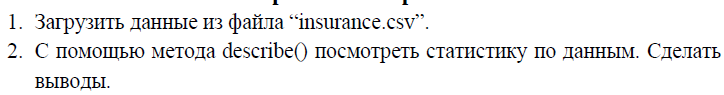

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns

In [2]:
data1 = pd.read_csv('insurance.csv')
print(data1.head(), '\n')
print(data1.isna().sum(), '\n')
print(data1.describe())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64 

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.1300

Исходя из представленных значений, можно сделать вывод о том, что
- в каждом атрибуте содержится одинаковое количество значений;
- среднее значение и медиана не сильно отличаются друг от друга кроме атрибута charges (медиана = 9382, среднее = 13270)
- у атрибута charges высокое стандартное отклонение (сильный разброс в данных, возможны выбросы)
- 25% людей не имеет детей
- средний возраст опрашиваемых людей = 39 годам

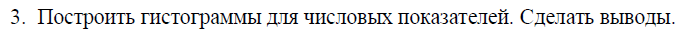

In [3]:
import matplotlib
matplotlib.colors.CSS4_COLORS

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3

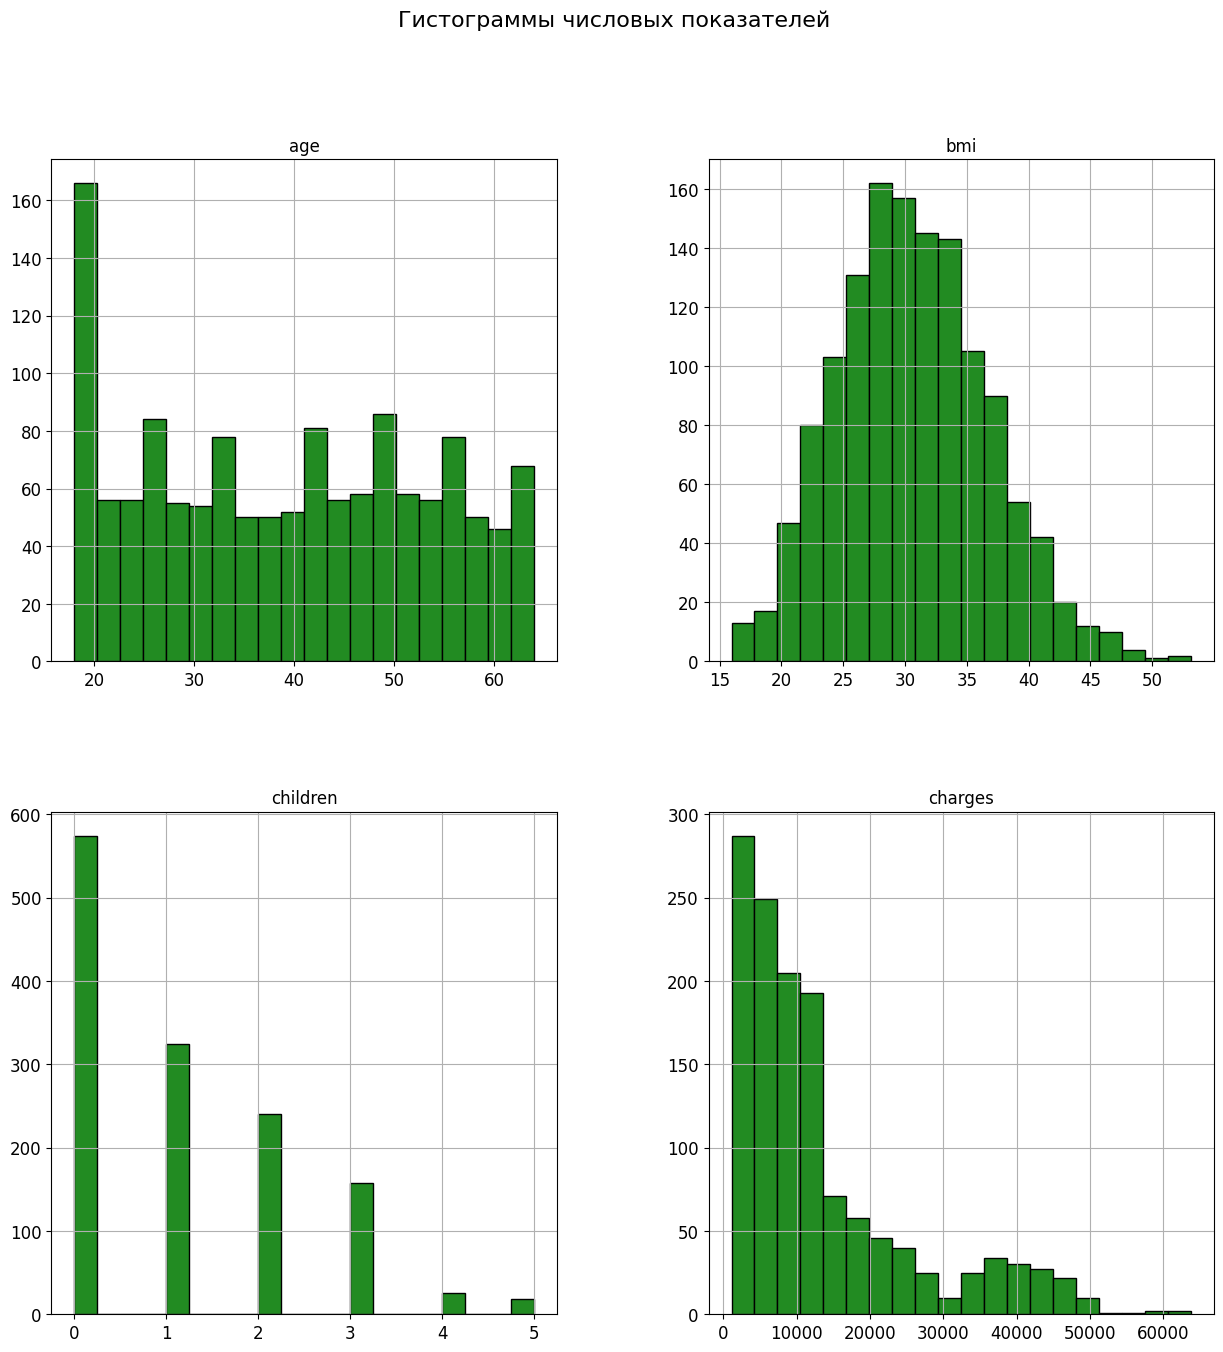

In [4]:
data1.hist(figsize=(15, 15), bins=20, edgecolor='black', color='forestgreen', xlabelsize=12, ylabelsize=12)
plt.suptitle('Гистограммы числовых показателей', fontsize=16)
plt.show()

Выводы по гистограммам:
- относительно равномерное распределение по возрасту с выбросом (люди в возрасте 18-20 лет)
- нормальное распределение индекса массы тела с центром около 30
- значительная часть людей не имеют детей
-

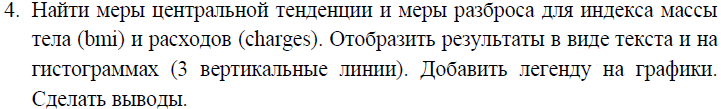

Меры центральной тенденции и меры разброса для BMI
Мода = 32.3
Медиана = 30.4
Среднее = 30.66339686098655
Стандартное отклонение = 6.098186911679017
Дисперсия = 37.187883609773266

Меры центральной тенденции и меры разброса для CHARGES
Мода = 1639.5631
Медиана = 9382.033
Среднее = 13270.422265141257
Стандартное отклонение = 12110.011236693994
Дисперсия = 146652372.1528548



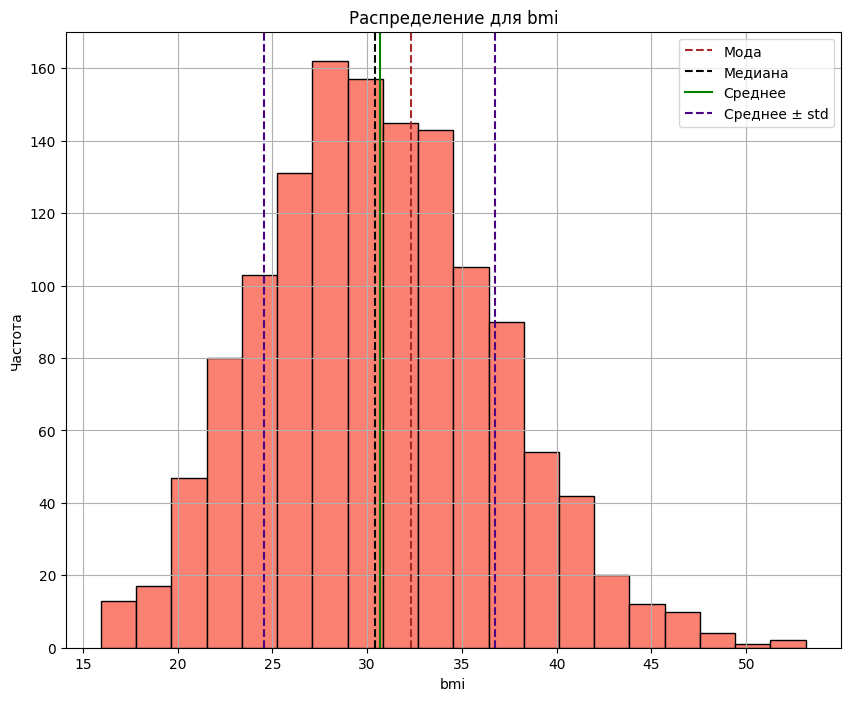

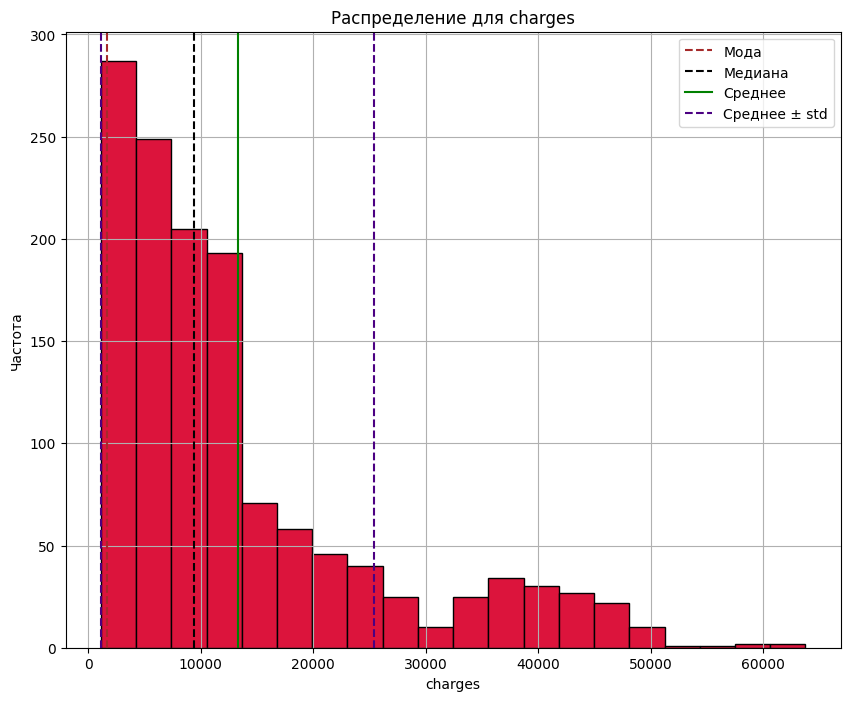

In [5]:
def plot_statistics(name, color, count_bins):
  mode = sts.mode(data1[name])[0]
  median = data1[name].median()
  mean = data1[name].mean()
  std = data1[name].std()
  print(f'Меры центральной тенденции и меры разброса для {name.upper()}')
  print(f'Мода = {mode}')
  print(f'Медиана = {median}')
  print(f'Среднее = {mean}')
  print(f'Стандартное отклонение = {std}')
  print(f'Дисперсия = {std**2}\n')

  plt.figure(figsize=(10, 8))
  plt.hist(data1[name], bins=count_bins, color=color, edgecolor='black')
  plt.axvline(mode, color='brown', linestyle='--', label='Мода')
  plt.axvline(median, color='black', linestyle='--', label='Медиана')
  plt.axvline(mean, color='green', linestyle='-', label='Среднее')
  plt.axvline(mean - std, color='indigo', linestyle='--', label='Среднее ± std')
  plt.axvline(mean + std, color='indigo', linestyle='--')
  plt.grid()
  plt.legend()
  plt.title(f'Распределение для {name}')
  plt.xlabel(name)
  plt.ylabel('Частота')

plot_statistics('bmi', color='salmon', count_bins=20)
plot_statistics('charges', color='crimson', count_bins=20)

- **bmi** имеет нормальное распределение (среднее и медиана практически совпадают, выбросов нет)
- **charges** имеет экспоненциальное распределение (медиана значительно выше среднего, много выбросов в данных)

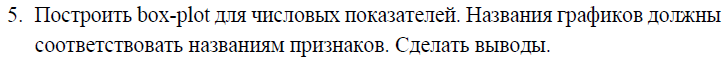

<Axes: ylabel='age'>

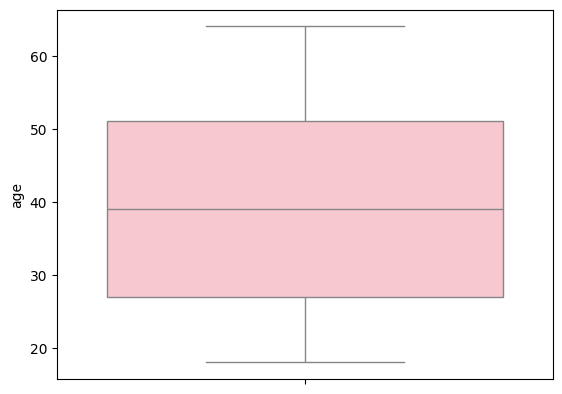

In [6]:
sns.boxplot(data1['age'], color='pink')

<Axes: ylabel='bmi'>

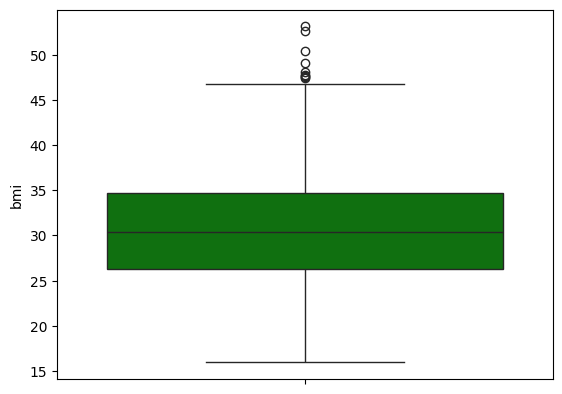

In [7]:
sns.boxplot(data1['bmi'], color='green')

<Axes: ylabel='children'>

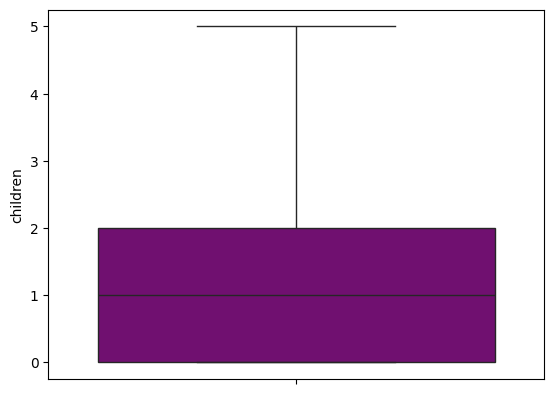

In [8]:
sns.boxplot(data1['children'], color='purple')

<Axes: ylabel='charges'>

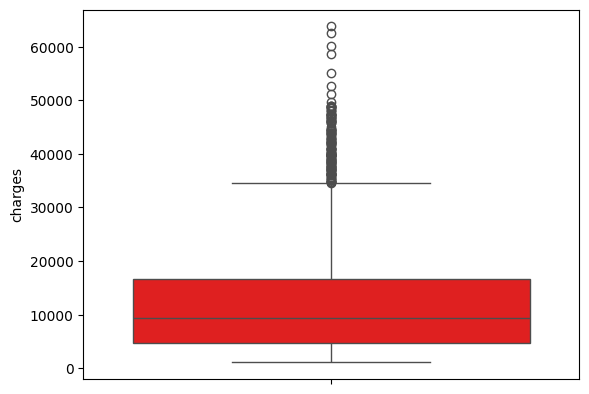

In [9]:
sns.boxplot(data1['charges'], color='red')

Выводы по графикам:
- **age** - данные равномерно распределены, выбросов нет, медианное значение = 37-38 лет, межквартильный размах охватывает возраст приблизительно 27-52 года
- **bmi** - распределение близко к нормальному, есть некоторые выбросы, медианное значение = 30, межквартильный размах  около 26-34 bmi
- **children** - большинство людей имеют от 0 до 2 детей, медианное значение = 1
- **charges** - ассиметрия в данных, много выбросов сверху (очень высокие расходы), медианное значение = 10000

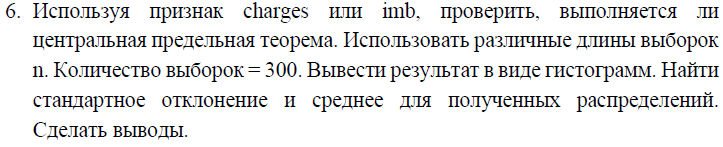

bmi:
Population mean: 30.66, std: 6.10
n=5: Среднее = 30.68, STD = 2.69
n=30: Среднее = 30.69, STD = 1.21
n=50: Среднее = 30.64, STD = 0.90
n=100: Среднее = 30.74, STD = 0.62


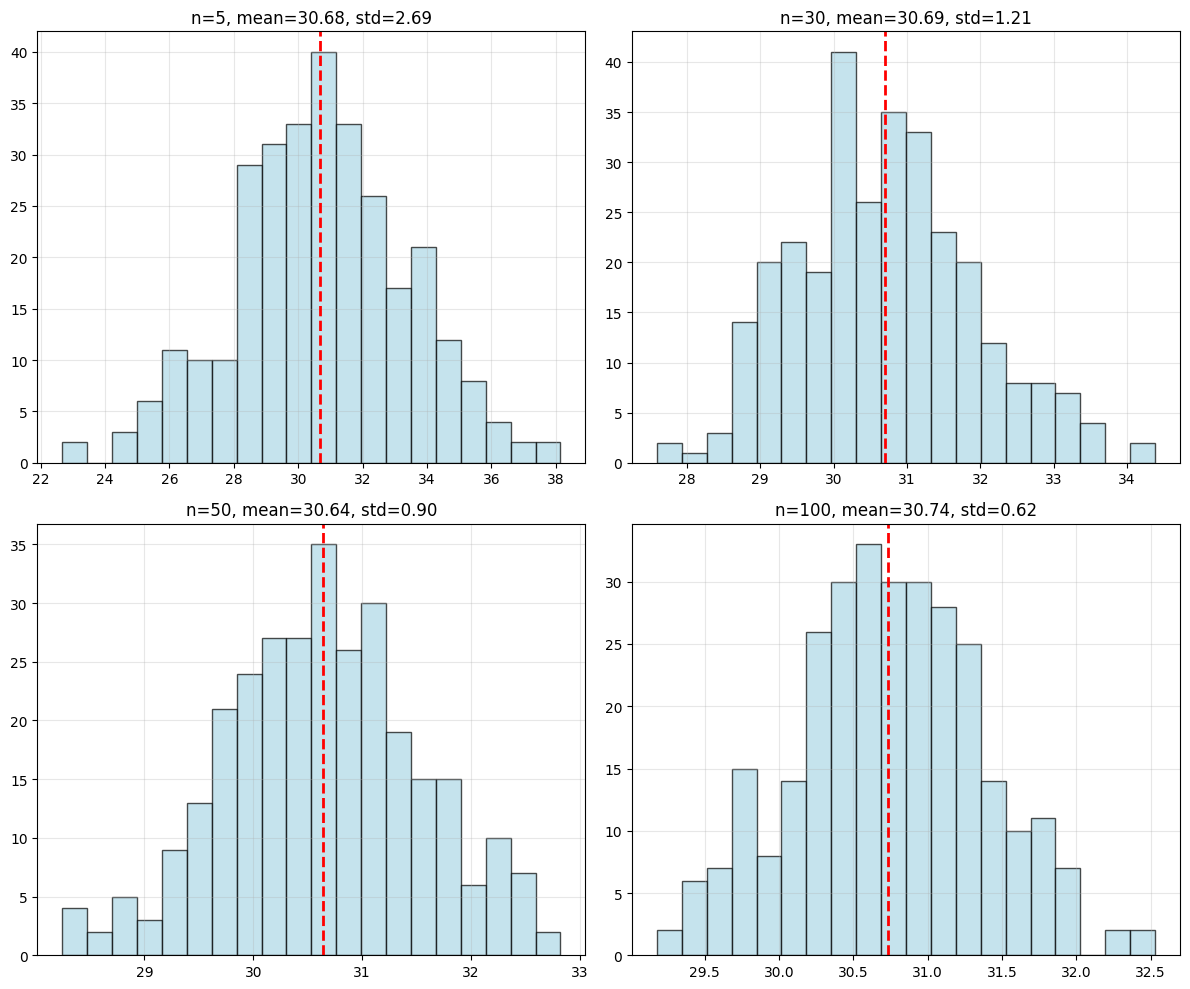


charges:
Population mean: 13270.42, std: 12110.01
n=5: Среднее = 13651.21, STD = 5589.66
n=30: Среднее = 13344.93, STD = 2094.81
n=50: Среднее = 13271.06, STD = 1643.49
n=100: Среднее = 13468.40, STD = 1161.33


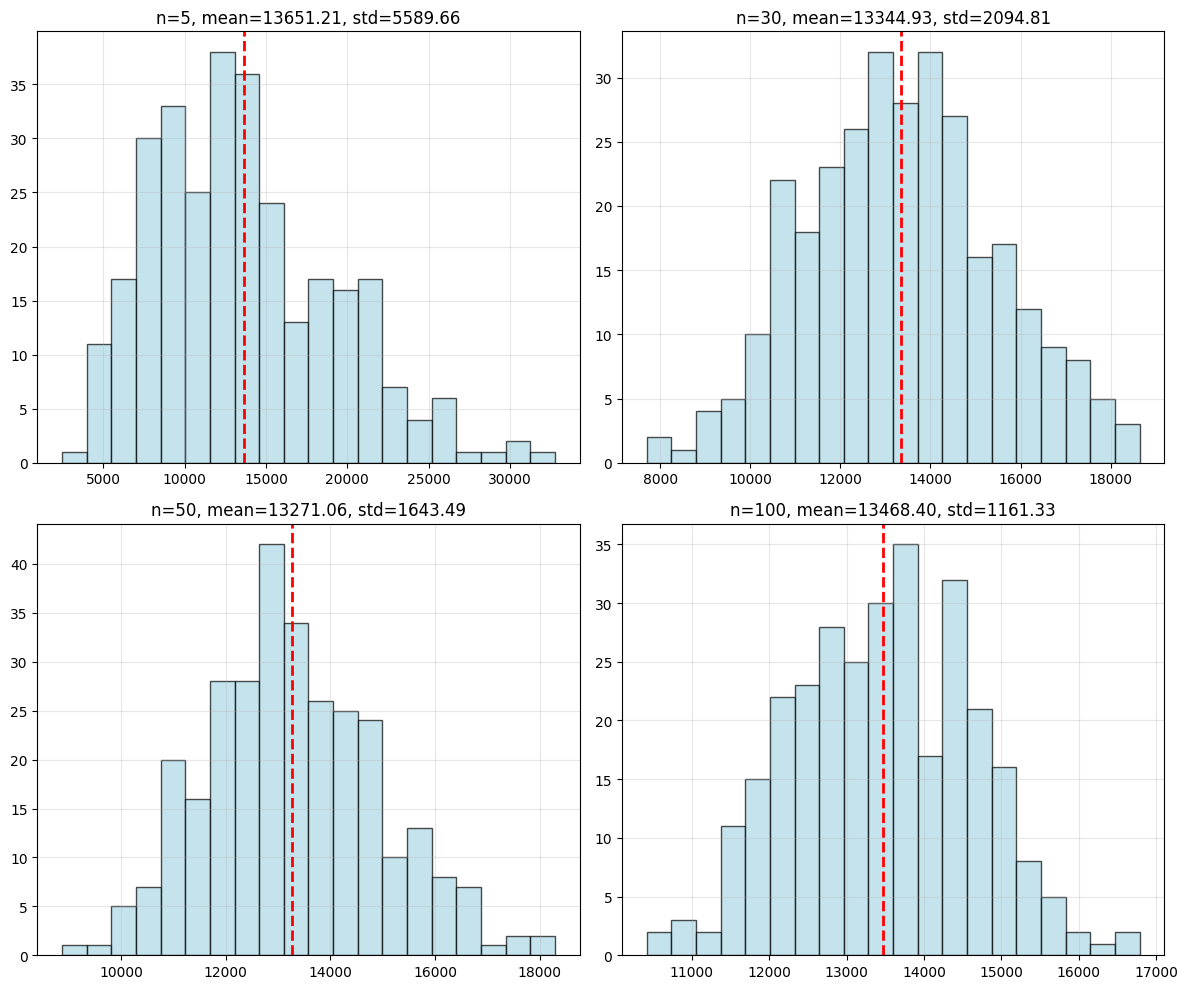

In [10]:
def check_clt(data, sample_sizes, num_samples=300):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.ravel()

    for i, n in enumerate(sample_sizes):
        sample_means = []
        for _ in range(num_samples):
            sample = np.random.choice(data, size=n, replace=True)
            sample_means.append(np.mean(sample))

        sample_means = np.array(sample_means)
        mean_of_means = np.mean(sample_means)
        std_of_means = np.std(sample_means)
        print(f"n={n}: Среднее = {mean_of_means:.2f}, STD = {std_of_means:.2f}")
        axes[i].hist(sample_means, bins=20, alpha=0.7, color='lightblue', edgecolor='black')
        axes[i].axvline(mean_of_means, color='red', linestyle='--', linewidth=2)
        axes[i].set_title(f'n={n}, mean={mean_of_means:.2f}, std={std_of_means:.2f}')
        axes[i].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

print(f"bmi:\nPopulation mean: {data1['bmi'].mean():.2f}, std: {data1['bmi'].std():.2f}")
check_clt(data1['bmi'].values, [5, 30, 50, 100])

print(f"\ncharges:\nPopulation mean: {data1['charges'].mean():.2f}, std: {data1['charges'].std():.2f}")
check_clt(data1['charges'].values, [5, 30, 50, 100])

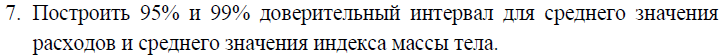

In [11]:
def conf_interval(data, conf=0.95):
  #n = len(data)
  mean = data.mean()
  std = data.std()
  margin = sts.norm.ppf((1 + conf) / 2) * std / np.sqrt(len(data)) # стандартная ошибка
  return mean, mean - margin, mean + margin

bmi_mean_95, bmi_l_95, bmi_up_95 = conf_interval(data1['bmi'], 0.95)
bmi_mean_99, bmi_l_99, bmi_up_99 = conf_interval(data1['bmi'], 0.99)
print(f'bmi\n95% доверительного интервала: [{bmi_l_95:.2f}, {bmi_up_95:.2f}]')
print(f'99% доверительного интервала: [{bmi_l_99:.2f}, {bmi_up_99:.2f}]')

charges_mean_95, charges_l_95, charges_up_95 = conf_interval(data1['charges'], 0.95)
charges_mean_99, charges_l_99, charges_up_99 = conf_interval(data1['charges'], 0.99)
print(f'\ncharges\n95% доверительного интервала: [{charges_l_95:.2f}, {charges_up_95:.2f}]')
print(f'99% доверительного интервала: [{charges_l_99:.2f}, {charges_up_99:.2f}]')


bmi
95% доверительного интервала: [30.34, 30.99]
99% доверительного интервала: [30.23, 31.09]

charges
95% доверительного интервала: [12621.54, 13919.30]
99% доверительного интервала: [12417.65, 14123.20]


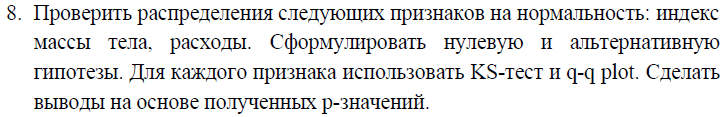

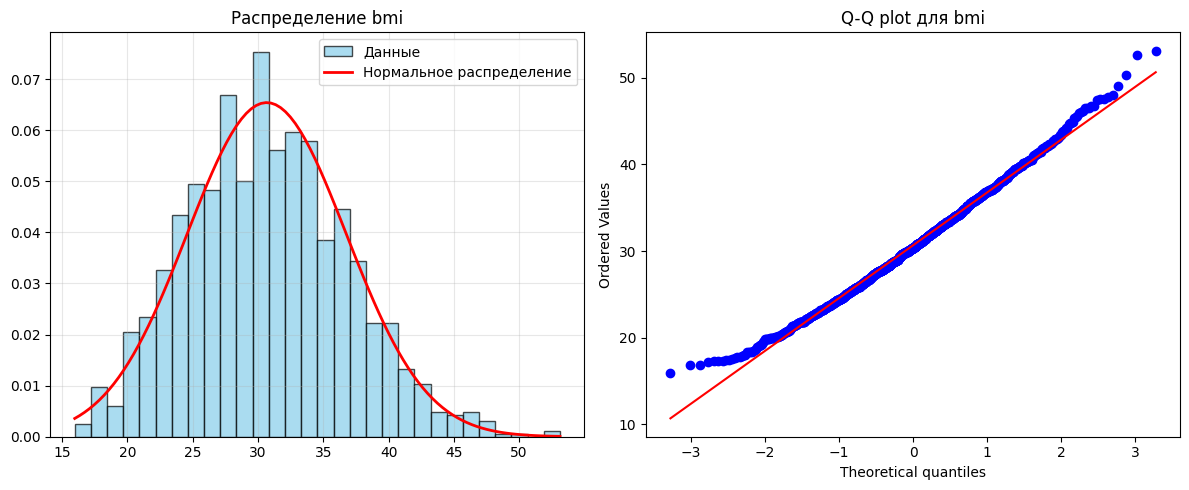


Проверка нормальности: bmi
KS-тест: statistic=0.0261, p-value=0.3163
Шапиро-Уилк: statistic=0.9939, p-value=0.0000
Асимметрия: 0.2840
Эксцесс: -0.0507

Вывод KS-теста: распределение нормальное
Вывод Шапиро-Уилка: распределение не нормальное
Асимметрия: слабая положительная


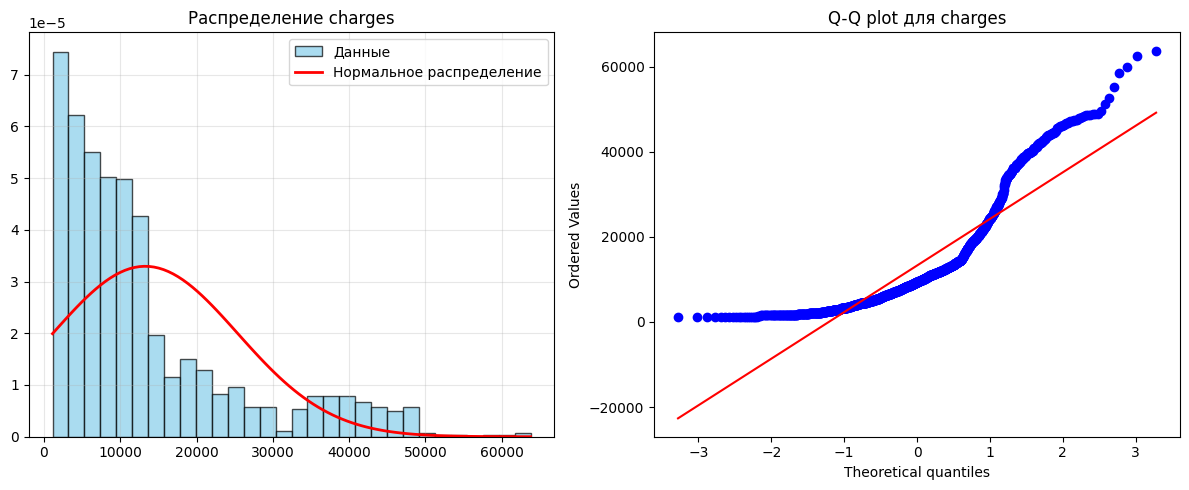


Проверка нормальности: charges
KS-тест: statistic=0.1885, p-value=0.0000
Шапиро-Уилк: statistic=0.8147, p-value=0.0000
Асимметрия: 1.5159
Эксцесс: 1.6063

Вывод KS-теста: распределение не нормальное
Вывод Шапиро-Уилка: распределение не нормальное
Асимметрия: сильная положительная


In [13]:
def check_normality(data: pd.Series, alpha: float = 0.05) -> dict:
    from scipy.stats import kstest, shapiro, norm, probplot
    import matplotlib.pyplot as plt
    import numpy as np

    name = data.name if data.name else 'данных'

    # статистические тесты
    data_standardized = (data - data.mean()) / data.std()
    ks_stat, ks_p = kstest(data_standardized, 'norm')
    shapiro_stat, shapiro_p = shapiro(data)

    # дополнительные метрики
    skewness = data.skew()
    kurtosis = data.kurtosis()

    # визуализация
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # гистограмма с нормальным распределением
    ax1.hist(data, bins=30, density=True, alpha=0.7, color='skyblue',
             edgecolor='black', label='Данные')

    x_range = np.linspace(data.min(), data.max(), 100)
    ax1.plot(x_range, norm.pdf(x_range, data.mean(), data.std()),
             'r-', linewidth=2, label='Нормальное распределение')

    ax1.set_title(f'Распределение {name}')
    ax1.legend()
    ax1.grid(alpha=0.3)

    # q-q plot
    probplot(data, dist="norm", plot=ax2)
    ax2.set_title(f'Q-Q plot для {name}')

    plt.tight_layout()
    plt.show()

    # формирование результатов
    results = {
        'ks_statistic': ks_stat,
        'ks_pvalue': ks_p,
        'shapiro_statistic': shapiro_stat,
        'shapiro_pvalue': shapiro_p,
        'skewness': skewness,
        'kurtosis': kurtosis,
        'is_normal_ks': ks_p > alpha,
        'is_normal_shapiro': shapiro_p > alpha,
        'sample_size': len(data)
    }

    # вывод результатов
    print(f"\nПроверка нормальности: {name}")
    print(f"KS-тест: statistic={ks_stat:.4f}, p-value={ks_p:.4f}")
    print(f"Шапиро-Уилк: statistic={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")
    print(f"Асимметрия: {skewness:.4f}")
    print(f"Эксцесс: {kurtosis:.4f}")

    # интерпретация
    normality_ks = "нормальное" if results['is_normal_ks'] else "не нормальное"
    normality_shapiro = "нормальное" if results['is_normal_shapiro'] else "не нормальное"

    print(f"\nВывод KS-теста: распределение {normality_ks}")
    print(f"Вывод Шапиро-Уилка: распределение {normality_shapiro}")

    # интерпретация асимметрии
    skew_level = ("сильная" if abs(skewness) > 1 else
                 "умеренная" if abs(skewness) > 0.5 else "слабая")
    skew_direction = "положительная" if skewness > 0 else "отрицательная"
    print(f"Асимметрия: {skew_level} {skew_direction}")

    return results

# Использование
bmi_results = check_normality(data1['bmi'])
charges_results = check_normality(data1['charges'])

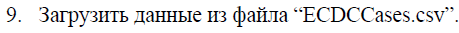

In [14]:
data2 = pd.read_csv('ECDCCases.csv')
data2.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
4,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266


In [15]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61904 entries, 0 to 61903
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     61904 non-null  object 
 1   day                                                         61904 non-null  int64  
 2   month                                                       61904 non-null  int64  
 3   year                                                        61904 non-null  int64  
 4   cases                                                       61904 non-null  int64  
 5   deaths                                                      61904 non-null  int64  
 6   countriesAndTerritories                                     61904 non-null  object 
 7   geoId                                                       61629 non-null  object 
 

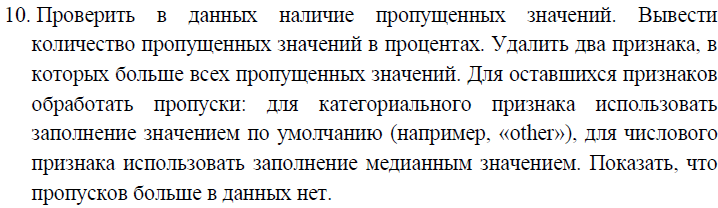

In [16]:
print(f'Количество пропусков\n{data2.isna().sum()}')
print(f'\n% пропусков\n{(data2.isna().sum() / len(data2) * 100).round(1)}\n')

data2_clean = data2.drop(columns=data2.isna().sum().nlargest(2).index)
print(f'После удаление 2 атрибутов\n{data2_clean.isna().sum()}\n')

for col in data2_clean.columns[data2_clean.isna().any()]:
  if data2_clean[col].dtype == 'object':
    data2_clean[col] = data2_clean[col].fillna('other')
  else: data2_clean[col] = data2_clean[col].fillna(data2_clean[col].median())

print(f'После обработки пропущенных значений\n{data2_clean.isna().sum()}')

Количество пропусков
dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          275
countryterritoryCode                                           123
popData2019                                                    123
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2879
dtype: int64

% пропусков
dateRep                                                       0.0
day                                                           0.0
month            

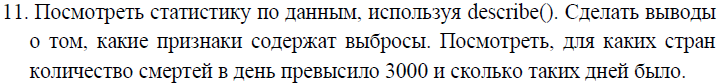

In [17]:
print(data2_clean.describe())

deaths_3000 = data2_clean[data2_clean['deaths'] > 3000]
print(f"\nСтраны: {deaths_3000['countriesAndTerritories'].unique()}")
print(f'Количество дней: {len(deaths_3000)}')

                day         month          year          cases        deaths  \
count  61904.000000  61904.000000  61904.000000   61904.000000  61904.000000   
mean      15.629232      7.067104   2019.998918    1155.079026     26.053987   
std        8.841624      2.954816      0.032881    6779.010824    131.222948   
min        1.000000      1.000000   2019.000000   -8261.000000  -1918.000000   
25%        8.000000      5.000000   2020.000000       0.000000      0.000000   
50%       15.000000      7.000000   2020.000000      15.000000      0.000000   
75%       23.000000     10.000000   2020.000000     273.000000      4.000000   
max       31.000000     12.000000   2020.000000  234633.000000   4928.000000   

        popData2019  
count  6.190400e+04  
mean   4.091909e+07  
std    1.529798e+08  
min    8.150000e+02  
25%    1.324820e+06  
50%    7.169456e+06  
75%    2.851583e+07  
max    1.433784e+09  

Страны: ['Argentina' 'Ecuador' 'Mexico' 'Peru' 'United_States_of_America']
Колич

- **cases** - есть отрицательные значения и экстремально высокие
- **deaths** - есть отрицательные значения и пики до 4928

image.png

In [18]:
print(f'Количество дубликатов в строках = {data2_clean.duplicated().sum()}')
data2_clean = data2_clean.drop_duplicates()
print(f'Количество дубликатов после drop = {data2_clean.duplicated().sum()}')

Количество дубликатов в строках = 4
Количество дубликатов после drop = 0


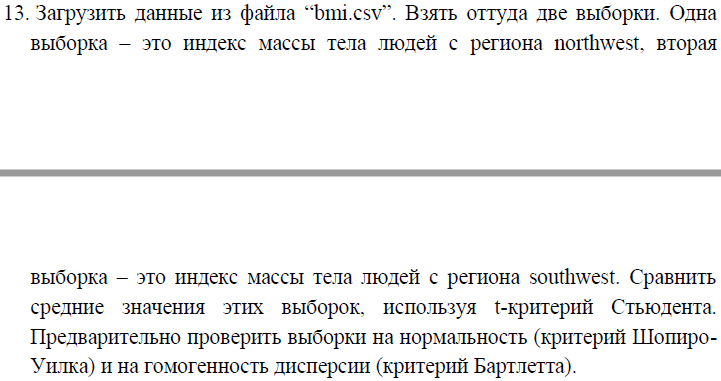

In [19]:
data3 = pd.read_csv('bmi.csv')

northwest = data3[data3['region']== 'northwest']['bmi']
southwest = data3[data3['region']== 'southwest']['bmi']
print(f'Размеры выборок:\nnorthwest = {len(northwest)}\nsouthwest = {len(southwest)}')
print(f'\nСредние значения выборок:\nnorthwest = {northwest.mean():.2f}\nsouthwest = {southwest.mean():.2f}')

print(f'\nНормальность по критерию Шопиро_Уилка:\nnorth_p_value = {sts.shapiro(northwest).pvalue:4f}\nsouth_p_value = {sts.shapiro(southwest).pvalue:4f}')

print(f'\nГомогенность дисперсии по критерию Бартлетта = {sts.bartlett(northwest, southwest).pvalue:4f}')
t_stat, p_value = sts.ttest_ind(northwest, southwest)
print(f'\np-value = {p_value:.4f}')

Размеры выборок:
northwest = 325
southwest = 325

Средние значения выборок:
northwest = 29.20
southwest = 30.60

Нормальность по критерию Шопиро_Уилка:
north_p_value = 0.465590
south_p_value = 0.362965

Гомогенность дисперсии по критерию Бартлетта = 0.065193

p-value = 0.0011


разница статистически значима (p_value < 0.05)

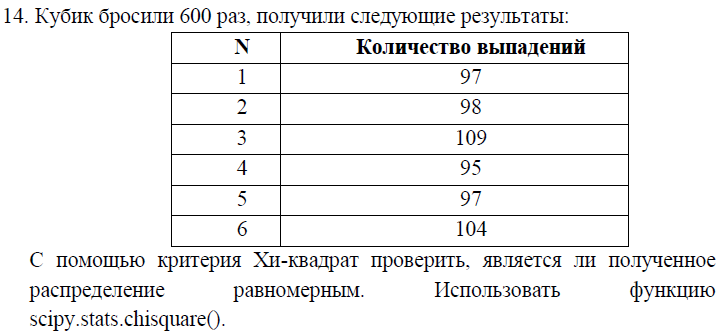

In [20]:
observed = [97, 98, 109, 95, 97, 104]
#print(sum(observed) / len(observed))
excepted = [100, 100, 100, 100, 100, 100,]

chi2, p_value = sts.chisquare(observed, excepted)
print(f'Хи^2 = {chi2}\np_value = {p_value:4f}')

Хи^2 = 1.44
p_value = 0.919888


Распределение является равномерным (p_value > 0.05)

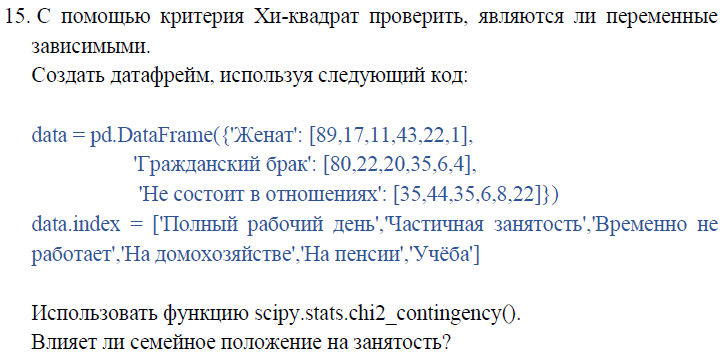

In [21]:
data = pd.DataFrame({'Женат': [89,17,11,43,22,1],\
                     'Гражданский брак': [80,22,20,35,6,4],\
                     'Не состоит в отношениях': [35,44,35,6,8,22]})
data.index = ['Полный рабочий день','Частичная занятость','Временно не работает','На домохозяйстве','На пенсии','Учёба']

cho2, p_value, dof, excepted = sts.chi2_contingency(data)
print(f'Хи^2 = {chi2}\np_value = {p_value:4f}\nСтепени свободы = {dof}')

if p_value < 0.05:
    print("ВЫВОД: Семейное положение ВЛИЯЕТ на занятость")
else:
    print("ВЫВОД: Семейное положение НЕ влияет на занятость")

Хи^2 = 1.44
p_value = 0.000000
Степени свободы = 10
ВЫВОД: Семейное положение ВЛИЯЕТ на занятость
